## 主成成分分析(PCA-Principle Component Analysis)

- 一个中心: 对原始特征空间的重构, 将相关特征转为无关特征, 将特征空间变成一组相互正交的基
- 两个基本点: 
    - 最大投影方差: 找到一个投影轴, 使其投影后方差最大
    - 最小重构代价: 是指数据分布足够散, 最好能独立还原为高维, 减少还原损失


#### 最大投影方差

- 先将数据进行中心化: $ x_i' = x_i - \bar x$

- 向量投影公式有: $ a \cdot b = \lVert a\rVert \lVert b\rVert \cos\theta$

- 假设 $ u_1$为投影轴, 故可以得到x的投影为 $ x' \cdot u_1 = x'^Tu1$

- 目标函数由中心化参数转换为原本数值生成的公式: $$ J = \frac1N\sum^N_{i=1}(x'^Tu_1- 0)^2 (s.t u_1^Tu_1 = 1) = u_1^TSu_1 (S \in xi)$$

- 使用拉格朗日乘子法, 令: $$ L(u_1, \lambda) = u_1^TSu_1 = \lambda(1 - x'^Tu1)$$

- 求导: $$ \frac{\delta L}{\delta u_1} = 2Su_1 - 2\lambda u_1 = 0$$

- 可得, 特征向量计算公式: $$ Su_1 =\lambda u_1$$

#### 最小重构代价

- 先将数据进行中心化: $ x_i' = x_i - \bar x$

- 将X重构到以特征向量为基的向量空间: $$ x_i'' = \sum^N_{i=1}(x_i'^Tu_k)u_k$$

- 最小重构是将降维后的 $ \hat{x_i}''$ 还原到 $x_i''$ 所需代价最小, 代价可以用其差值来表示: 
$$ J = \frac1n\sum^N_{i=1}\lVert x_i'' - \hat{x_i}''\rVert^2 = \frac1n\sum^N_{i=1} \lVert \sum^p_{k=q+1}(x_i'^Tu_k)u_k\rVert^2$$

- 计算可得: $$ J = \sum^p_{k=q+1}u_k^TSu_k, s.t u_k^Su_k = 1$$

- 使用拉格朗日乘子法, 可得: $$ Su_k = \lambda_ku_k $$

#### 奇异值分解(SVD)

- 中心矩阵H对数据X进行中心化: $ X \to HX$

- 对中心化后的矩阵进行奇异值分解: $ HX = U\Sigma V^T$
    - 在SVD中, U为 $N\times N$的矩阵, 并且 $U^TU = I$
    - $\Sigma$为 $N\times P$的矩阵, 是对角矩阵
    - $V^T$为 $P\times P$的矩阵, 并且 $V^TV = VV^T = I$

- 将奇异值分解代入到方差矩阵表达中, 可得(除N怎么不见了): $$ S = \frac1nX^TH^THX = V\Sigma^T\Sigma V^T$$

> 其中, V是S的特征向量, $ \Sigma^T\Sigma$ 是特征值矩阵, 等价于上一节的结果

#### 主坐标分析(PCoA-Principle Coordinate Analysis)

- 令 $$ T = HXX^TH^T = U\Sigma\Sigma^T U^T$$
    - 在主成分分析中, 将X投影到主成分后, 得到对应坐标为: $HX\cdot V = U\Sigma V^TV = U\Sigma$
    - 使用主坐标分析, 可以跳过获取主成分向量, 直接获取坐标 $U\Sigma$

- 与主成分分析的区别在于S为 $p\times p$的矩阵, T为 $N\times N$的矩阵, 以数据量为矩阵大小的T适合数据量较小(亦或小于特征数)时可以节省计算量

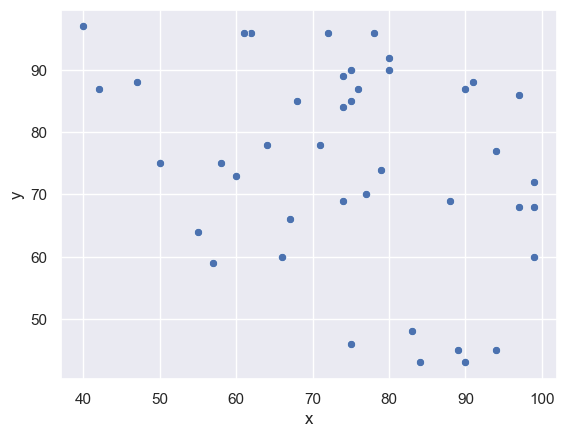

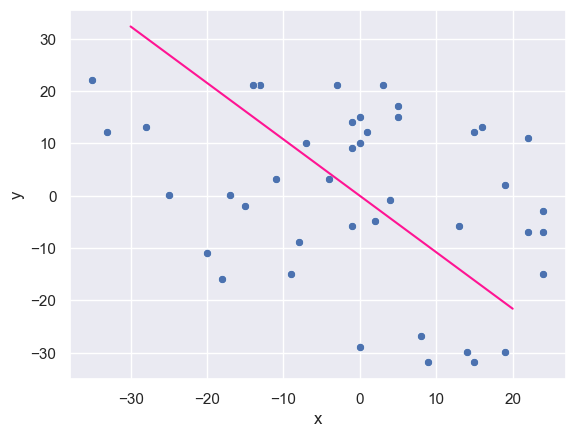

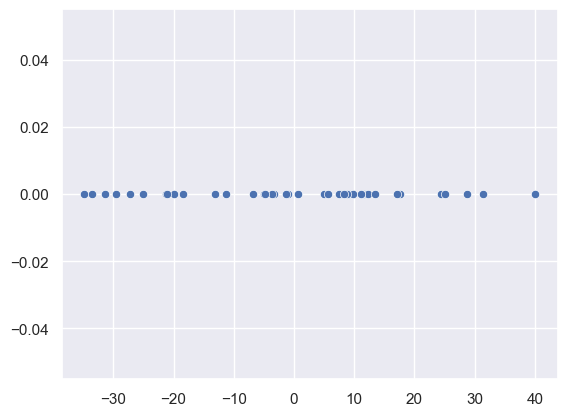

In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

dataUrl = '.\\scatter.csv'
df = pd.read_csv(dataUrl)

# 绘制原始分布
sns.set()
sns.scatterplot(x="x", y="y", data=df)
plt.show()

X_ = df - df.mean()

# 绘制中心化后的分布
sns.scatterplot(x="x", y="y", data=X_)

hx = np.array(X_) 
U, S, V = np.linalg.svd(hx)

# 第一个主成分向量
a = V[0,1]/V[0,0] 
x_points = np.linspace(-30,20, 50)
y_sw = a * x_points
sns.lineplot(x=x_points, y = y_sw, color='deeppink')
plt.show()

## 将特征值组装为NxP的向量, 计算得到降维后的坐标并绘图
s = np.zeros((42, 2))
s[0,0] = S[0]
s[1,1] = S[1]
xx = np.matmul(U,s)
sns.scatterplot(x=xx[:,0], y=xx[:,1] )
plt.show()